# Knn-Regression: 최근접 이웃 회귀 _ 2022.08.31(수)
---


#1.최근접 이웃 회귀
**1-1) 데이터 준비 : 농어의 길이와 무게**



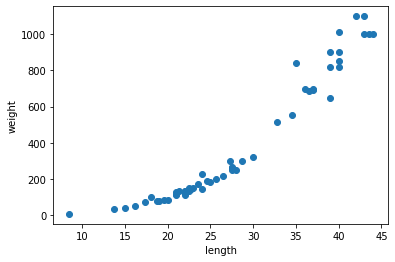

In [63]:
# 데이터 준비 : 농어의 길이와 무게
import numpy as np
import matplotlib.pyplot as  plt

perch_length = np.array([8.4,	13.7,	15.0,	16.2,	17.4,	18.0,	18.7,	19.0,	19.6,	20.0,	
21.0,	21.0,	21.0,	21.3,	22.0,	22.0,	22.0,	22.0,	22.0,	22.5,	
22.5,	22.7,	23.0,	23.5,	24.0,	24.0,	24.6,	25.0,	25.6,	26.5,	
27.3,	27.5,	27.5,	27.5,	28.0,	28.7,	30.0,	32.8,	34.5,	35.0,	
36.5,	36.0,	37.0,	37.0,	39.0,	39.0,	39.0,	40.0,	40.0,	40.0,	
40.0,	42.0,	43.0,	43.0,	43.5,	44.0])

perch_weight =	np.array([5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,	
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,	130.0,
150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,	197.0,	218.0,	
300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,	514.0,	556.0,	840.0,	
685.0,	700.0,	700.0,	690.0,	900.0,	650.0,	820.0,	850.0,	900.0,	1015.0,
820.0,	1100.0,	1000.0,	1100.0,	1000.0,	1000.0])

#	산점도 확인
plt.scatter(perch_length,	perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**1-2) 훈련세트와 테스트 세트 준비**

In [64]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)

print('변환 전: ', train_input.shape, test_input.shape) # reshape(-1,1): -1: 행의 크기를 자동지동

# 2차원 배열로 변경
train_input  = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print('변환 후: ', train_input.shape, test_input.shape)

변환 전:  (42,) (14,)
변환 후:  (42, 1) (14, 1)


**1-3) knn 알고리즘 정확도 계산**
  
• 결정 계수 (R^2)   
-> 1- (target - 예측)^2의 합/(target-target평균)^2의 합  
• 회귀식이 얼마나 정확한지를 나타내는 숫자 (0 ≤ R^2 ≤ 1)  
– 0에 가까울수록, 회귀식의 정확도는 낮음  
– 1에 가까울 수록, 회귀식의 정확도는 높음  




In [65]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
score = knr.score(test_input,test_target)
print('knn 알고리즘 정확도 계산(결정계수R^2):', score)

knn 알고리즘 정확도 계산(결정계수R^2): 0.992809406101064


**1-4) mean_absolute_error(MAE) : 평균 절대 오차**

In [66]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print('MAE:',mae)

MAE: 19.157142857142862


**1-5) 과대적합 vs 과소적합**  
• 과대적합(Overfitting)  
-- 훈련 세트에만 잘 맞는 모델
-- 테스트 세트에서는 점수가 굉장히 나쁨
-- 일반성이 떨어짐  
• 과소적합(Underfitting)  
-- 훈련 세트보다 테스트 세트의 점수가 높거나,  
-- 훈련 세트와 테스트 세트의 두 점수가 모두 낮음  
--  모델이 너무 단순해서 훈련 세트로 훈련이 되지 않은 경우  

In [67]:
print('훈련세트 점수:', knr.score(train_input, train_target))
print('테스트세트 점수:', knr.score(test_input, test_target))


훈련세트 점수: 0.9698823289099254
테스트세트 점수: 0.992809406101064


**1-6) 모델 개선: 이웃 개수 줄이기**  
-- 과소 적합 해결 방안: 이웃 개수 줄이기

In [68]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print("훈련세트 점수:",knr.score(train_input, train_target))
print("테스트세트 점수:",knr.score(test_input, test_target))

훈련세트 점수: 0.9804899950518966
테스트세트 점수: 0.9746459963987609


**1-7) 이웃 수에 따른 그래프 비교**  
-- 이웃수: 1, 5, 10  
-- 농어 길이: 5 ~ 45까지 변경하며 무게 예측  


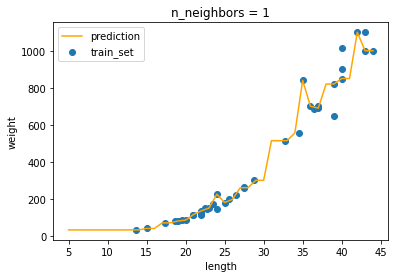

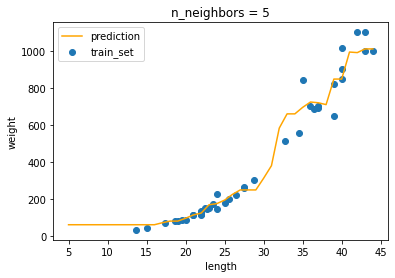

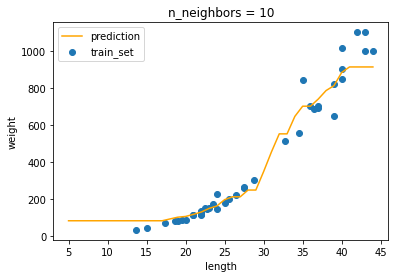

In [69]:
x = np.arange(5,45).reshape(-1,1)
for n in [1,5,10]:
  # 모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # x(농어 길이)에 대한 무게 예측
  prediction = knr.predict(x)

  # 이웃 갯수에 따른 선형성 확인
  plt.scatter(train_input,train_target, label='train_set')
  plt.plot(x,prediction, label='prediction',color='orange')
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.legend()
  plt.show()

# 2. 선형 회귀  
**• knn 회귀 알고리즘의 문제점**  
-- 가장 가까운 샘플을 찾아 평균값 계산  
-- 새로운 샘플이 훈련 세트의 범위를 벗어나면 잘못된 예측을 함

In [115]:
# 데이터 준비

import	numpy as	np
perch_length =	np.array([8.4,	13.7,	15.0,	16.2,	17.4,	18.0,	18.7,	19.0,	19.6,	20.0,
21.0,	21.0,	21.0,	21.3,	22.0,	22.0,	22.0,	22.0,	22.0,	22.5,
22.5,	22.7,	23.0,	23.5,	24.0,	24.0,	24.6,	25.0,	25.6,	26.5,
27.3,	27.5,	27.5,	27.5,	28.0,	28.7,	30.0,	32.8,	34.5,	35.0,
36.5,	36.0,	37.0,	37.0,	39.0,	39.0,	39.0,	40.0,	40.0,	40.0,
40.0,	42.0,	43.0,	43.0,	43.5,	44.0])
perch_weight =	np.array([5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,	130.0,
150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,	197.0,	218.0,
300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,	514.0,	556.0,	840.0,
685.0,	700.0,	700.0,	690.0,	900.0,	650.0,	820.0,	850.0,	900.0,	1015.0,
820.0,	1100.0,	1000.0,	1100.0,	1000.0,	1000.0])

**2-1) 훈련 세트 밖의 샘플 예측**  
-- 50cm, 100cm 길이의 농어 무게 예측 --> 동일한 값으로 잘못 예측됨.

In [116]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
                                                          perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()
knr.fit(train_input,train_target)

# 예측값 비교
print('50cm 농어 무게 예측: ',knr.predict([[50]]))
print('100cm 농어 무게 예측: ',knr.predict([[100]]))

50cm 농어 무게 예측:  [1010.]
100cm 농어 무게 예측:  [1010.]


**2-2) 50cm, 100cm 길이의 농어의 이웃 및 산점도 비교**

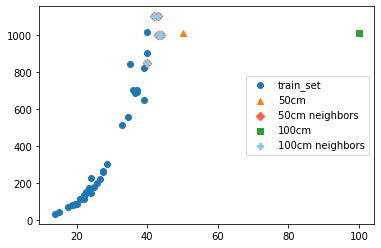

50cm neighbor indexes: [[34 14  8 40  6]]
100cm neighbor indexes: [[34 14  8 40  6]]
50cm neighbor weight mean: 1010.0
100cm neighbor weight mean: 1010.0


In [117]:
# 50,100cm 농어 이웃의 길이 및 인덱스 
distance50, indexes_50 = knr.kneighbors([[50]])
distance100, indexes_100 = knr.kneighbors([[100]])

# 훈련세트 산점도
plt.scatter(train_input, train_target, label='train_set')

# 50cm 농어와 이웃 산점도
plt.scatter(50,1010, marker='^', label = '50cm')
plt.scatter(train_input[indexes_50], train_target[indexes_50], 
            color = 'tomato',marker='D',label='50cm neighbors')
# 100cm 농어와 이웃 산점도
plt.scatter(100,1010, marker='s', label = '100cm')
plt.scatter(train_input[indexes_100], train_target[indexes_100], 
            color ='skyblue',marker='P',label='100cm neighbors')
#plt.xlim(0,110)
plt.legend(loc=5)
plt.show()

# 훈련데이터에서 이웃 데이터의 인덱스 확인
print('50cm neighbor indexes:', indexes_50)
print('100cm neighbor indexes:', indexes_100)

# 이웃데이터의 무게 평균 계산
print('50cm neighbor weight mean:',np.mean(train_target[indexes_50]))
print('100cm neighbor weight mean:',np.mean(train_target[indexes_100]))

**2-3) 선형 회귀(Linear Regression)**  
-- 특성과 타킷 사이의 관계: 선형 방정식의 계수(기울기) 와 절편에 저장


In [118]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

# 50cm 농어 weight 예측
print('50cm 농어 무게: ', lr.predict([[50]]))

#	기울기(a):	coef_,	절편(bias):	intercept_
print('모 델 기 울 기: ', lr.coef_)
print('모 델  절   편: ', lr.intercept_)

50cm 농어 무게:  [1241.83860323]
모 델 기 울 기:  [39.01714496]
모 델  절   편:  -709.0186449535477


**2-4) 기울기와 절편을 이용한 1차 방정식 그래프**

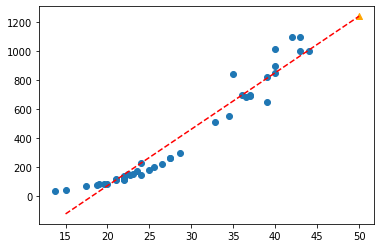

train data source:  0.939846333997604
test data source:  0.8247503123313558


In [119]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

#	plot([x축 데이터:시작, 끝],	[y축 데이터:시작, 끝])
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='red',linestyle='--')
plt.scatter(50,1241.8, marker='^', color= 'orange')
plt.show()

print('train data source: ', lr.score(train_input, train_target))
print('test data source: ', lr.score(test_input, test_target))

**2-5) 다항 회귀(Polynomail Regression)**  
  
• 농어의 길이와 무게에 대한 산점도  
-- 일직선(1차 방정식)으로 표현하기 어려움  
-- 무게가 0 이하일 가능성 발생  
-- 모델이 더 복잡할 필요성이 있음  
  
• 최적의 곡선(2차 방정식)을 구함  
-- 길이를 제곱한 항을 훈련 세트에 추가해야 됨  


In [120]:
# 길이 제곱 데이터를 훈련 세트에 추가
train_poly = np.column_stack((train_input**2,	train_input))
test_poly =	np.column_stack((test_input**2,	test_input))

print('1.길이 제곱 데이터 추가된 훈련세트:\n',train_poly[0:5])
print('2.배열 변화:',train_poly.shape, test_poly.shape)

# 다항 회귀식 구하기 

lr = LinearRegression()
lr.fit(train_poly, train_target)

print('3.50cm 농어 무게예측: ',lr.predict([[50**2, 50]]))
print('4.50cm 농어 기울기, 절편: ',lr.coef_, lr.intercept_)

1.길이 제곱 데이터 추가된 훈련세트:
 [[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
2.배열 변화: (42, 2) (14, 2)
3.50cm 농어 무게예측:  [1573.98423528]
4.50cm 농어 기울기, 절편:  [  1.01433211 -21.55792498] 116.0502107827827


**2-6) 훈련 세트의 산점도와 2차 방정식 그래프**  
$ 농어 무게 = a×길이^2 + b×길이 + c $   
$ = 1.01×길이^2 − 21.6×길이 + 116.05 $


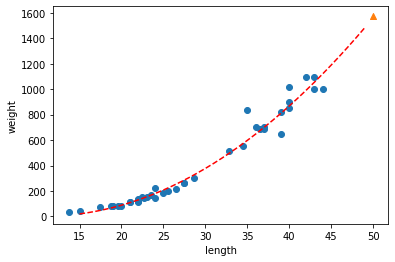

train score: 0.9706807451768623
test  score: 0.9775935108325122
train score < test score : 과소적합이 남아 있음.
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49]


In [122]:
plt.scatter(train_input,train_target)

point = np.arange(15,50)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05, color ='red', linestyle='--')

plt.scatter([50],[1574], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print('train score:', lr.score(train_poly,	train_target))
print('test  score:', lr.score(test_poly,	test_target))
print('train score < test score : 과소적합이 남아 있음.')

# 3. 특성 공학과 규제  
  
**• 다중 회귀(Multiple Regression)**  
-- 여러 특성을 사용한 선형 회귀  
-- 길이, 높이, 두께  
-- polynomiaa Features 클래스 사용  
  
**• 특성 공학**  
-- 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업  


**3-1) 데이터 준비 : https://bit.ly/perch_csv**

In [72]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print('농어 array \n', perch_full[:5])
print('농어 array type: ',perch_full.shape)

농어 array 
 [[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
농어 array type:  (56, 3)


**3-2) 훈련세트 & 데이터세트로 분리**

In [114]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
                                                  perch_full, perch_weight, random_state = 42)
print(train_input[:5])
print(train_target[:5])

[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]]
[ 85. 135.  78.  70. 700.]


**3-3) 훈련세트를 사용하여 다항 특성 만들기: 사이킷런 변환기(Transformer)**  
  
**1.Ploynomial Features(include_bias = True)**
- include_bias = True: bias(절편, 0차항) 추가
- include_bias = False: bias 삭제
  
**2.fit([a,b]): 특성 조합을 찾음**
-  특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가
- $ [1,a,b,a*b,a^2,b^2] 추가 $  
  
**3.transform([[a,b]])**
- 특성 조합을 실제 데이터로 변환









In [79]:
# PolynomialFeaures 간단 예제

# 1.(include_bias=True)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()     #	include_bias=True	(기본값)
poly.fit([[2,3]])               #	2,3의 조합을 찾음(2^2,	3^2,	2x3)
print(poly.transform([[2,3]]))  #	특성 조합을 데이터로 변환

# 2.(include_bias=False)
poly = PolynomialFeatures(include_bias=False) # include_bias = False: 1제거
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [84]:
# 훈련세트를 사용하여 다항 특성 만들기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print('다항 특성 추가된 훈련세트 \n',train_poly[0:3])
print('훈련세트 형태: ',train_poly.shape)

test_poly = poly.transform(test_input)

# get_feature_names() : 각 특성 조합 정보
print('각 특성 조합 정보:', poly.get_feature_names())

다항 특성 추가된 훈련세트 
 [[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
훈련세트 형태:  (42, 9)
각 특성 조합 정보: ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**3-4) 다중 회귀 모델 훈련 1**
- 선형 회귀 모델 훈련과 동일 (여러 개의 특성을 사용할 뿐임)  
- 특성이 늘어나면 선형 회귀의 정확도 증가

In [87]:
from	sklearn.linear_model import	LinearRegression
lr =	LinearRegression()
lr.fit(train_poly,	train_target)
print('훈련 다중회귀모델 점수: ', lr.score(train_poly,	train_target))
print('테스트 다중회귀모델 점수: ', lr.score(test_poly,	test_target))

다중회귀모델 점수:  0.9903183436982124
다중회귀모델 점수:  0.9714559911594134


**3-5) 다중 회귀 모델 훈련 2**
- degree 증가
- 고차항의 최대 차수 지정
- 3제곱, 4제곱, 5제곱 항 추가


In [94]:
#	고차항의 최대 차수 증가 (5차)
poly =	PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly =	poly.transform(train_input)
test_poly =	poly.transform(test_input)
print('훈련 세트 형태:' ,train_poly.shape)

#	선형 회귀 모델 훈련 및 훈련 세트 점수 계산
lr.fit(train_poly,	train_target)
print('train score:', lr.score(train_poly,	train_target))

#	테스트 세트 점수 계산
print('test  score:', lr.score(test_poly,	test_target),"<- 과대적합")


훈련 세트 형태: (42, 55)
train score: 0.9999999999991097
test  score: -144.40579242684848 <- 과대적합


**3-6) 규제(Regularization)**  
  
- 모델이 훈련 세트에 과대 적합되는 것을 방지  
- 선형 회귀 모델: 특성에 곱해지는 계수의 크기를 작게 줄임
- L1 규제 (L1	Regularization)
  - 계수(가중치)의 합을 더한 값에 규제 강도(ƛ)를 곱하여 오차에 더함
  - 어떤 가중치는 0이 됨
- L2 규제 (L2	Regularization)
  - 각 계수(가중치) 제곱의 합에 규제 강도(ƛ)를 곱합
  - ƛ를 크게 하면 가중치가 더 감소(규제 강화), ƛ를 작게 하면 가중치가 증가   
  

**규제 모델**   
- 릿지(Ridge) 모델: L2	regularization
  - 계수를 제곱한 값을 기준으로 규제
- 라쏘(Lasso) 모델: L1	regularization
  - 계수(가중치)의 절대값을 기준으로 규제 

    
    
**규제 전에 표준화 과정이 필요**
- 각 특성의 크기(스케일)가 다르기 때문에 표준화 과정이 필요
- StandardScaler 클래스 사용

In [95]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

**3-7)릿지 회귀**
- sklearn.linear_model 패키지
- fit()로 훈련, score()메소드로 평가
- Ridge(alpha=1.0)
- alpha값이 크면 규제 강도가 세짐 (계수 값을 더 줄임)

In [100]:
from sklearn.linear_model import Ridge

ridge = Ridge() # alpha = 1.0
ridge.fit(train_scaled, train_target)
print('릿지 훈련 모델 점수  : ',ridge.score(train_scaled, train_target))  # 훈련세트 점수 확인
print('릿지 테스트 모델 점수: ',ridge.score(test_scaled,	test_target)) 

릿지 훈련 모델 점수  :  0.9896101671037343
릿지 테스트 모델 점수:  0.9790693977615391


**3-8) 릿지회귀: 적절한 규제 강도 찾기**
- 적절한 alpha 값 찾기
  - alpha값을 변경하면서 결정 계수(R2)의 값을 비교
    - alpha=0.1	(-1은 log	적용 10^(-1))일 때, 두 그래프가 가장 가까움

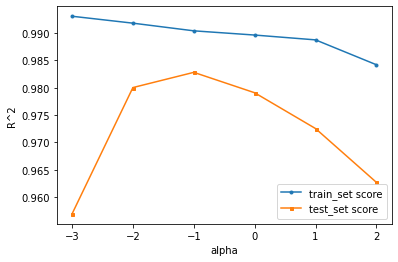

그래프에서 train, test 거리가 가장 가까운 alpha가 적합, 멀수록 과대적합
최적 -> (alpha = 0.1)
릿지 훈련세트 score: 0.9903815817570365
릿지 테스트세트 score: 0.9827976465386884


In [106]:
# 적절한 alpha값 찾기
import	matplotlib.pyplot as	plt

train_score =	[]
test_score =	[]

alpha_list =	[0.001,	0.01,	0.1,	1,	10,	100]
for	alpha	in	alpha_list:
  ridge	=	Ridge(alpha=alpha)
  ridge.fit(train_scaled,	train_target)
  #훈련 세트와 테스트 세트 점수를 저장
  train_score.append(ridge.score(train_scaled,	train_target))
  test_score.append(ridge.score(test_scaled,	test_target))

plt.plot(np.log10(alpha_list),	train_score,
          label='train_set score',	marker='o',	markersize=3)
plt.plot(np.log10(alpha_list),	test_score,
          label='test_set score',	marker='s',	markersize=3)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

# 최적의 alpha  찾기
print('그래프에서 train, test 거리가 가장 가까운 alpha가 적합, 멀수록 과대적합')

# alpha=0.1적용시 점수 확인
ridge	=	Ridge(alpha = 0.1)
ridge.fit(train_scaled,	train_target)
print('최적 -> (alpha = 0.1)')
print('릿지 훈련세트 score:',ridge.score(train_scaled,	train_target))
print('릿지 테스트세트 score:',ridge.score(test_scaled,	test_target))

**3-9)라쏘(Lasso)회귀**
- 불필요한 계수를 급격히 감소, 0으로 만들어 제거
- sklearn.linear_model 패키지
- fit()로 훈련, score()메소드로 평가
- Lasso(alpha=1.0)
    - alpha값이 크면 규제 강도가 세짐 (계수 값을 더 줄임)
    - alpha=0.0: 기존 선형 회귀와 동일


In [109]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('라쏘 훈련 세트 점수  : ',lasso.score(train_scaled, train_target))
print('라쏘 테스트 세트 점수: ',lasso.score(test_scaled, test_target))

라쏘 훈련 세트 점수  :  0.989789897208096
라쏘 테스트 세트 점수:  0.9800593698421883


**3-10) 라쏘 회귀: 적절한 규제 강도 찾기**
- alpha값을 변경하면서 결정 계수(R2)의 값을 비교
  - alpha=10일 때,	최적 (10^1=10)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


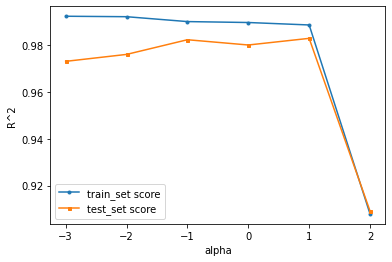

최적 alpha = 10
라쏘 훈련 세트 점수  :  0.9888067471131867
라쏘 테스트 세트 점수:  0.9824470598706695


In [112]:
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list), train_score,label='train_set score',	marker='o',	markersize=3)
plt.plot(np.log10(alpha_list),	test_score, label='test_set score',	marker='s',	markersize=3)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

# 최적 alpha 찾가
print('최적 alpha = 10')
lasso	=	Lasso(alpha=10)
lasso.fit(train_scaled,	train_target)
print('라쏘 훈련 세트 점수  : ',lasso.score(train_scaled,	train_target))
print('라쏘 테스트 세트 점수: ',lasso.score(test_scaled,	test_target))